In [54]:
import numpy as np
import pandas as pd
from statsmodels.regression.linear_model import OLS as ols
import matplotlib.pyplot as plt

In [62]:
np.random.seed(1)

N = 90
x_mean = 10
x_var = 25
beta = np.array([-8, 1.5]).reshape([-1, 1])

epsilon = np.random.normal(0, 5, N).reshape([-1, 1])
x = np.random.normal(x_mean, np.sqrt(x_var), N).reshape([-1, 1])
x = np.concatenate([np.ones_like(x), x], axis=1)
y = np.dot(x, beta) + epsilon

# x_ = 1
beta_ = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
resid = y - np.dot(x, beta_)

regfit = ols(y, x).fit()

print(beta)
print(beta_)
print(regfit.params)
print(regfit.summary())

[[-8. ]
 [ 1.5]]
[[-7.23931905]
 [ 1.45602582]]
[-7.23931905  1.45602582]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     187.5
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           1.60e-23
Time:                        10:45:27   Log-Likelihood:                -264.38
No. Observations:                  90   AIC:                             532.8
Df Residuals:                      88   BIC:                             537.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

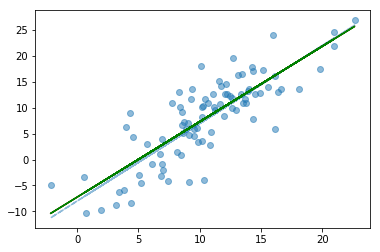

In [63]:
plt.figure('GLM')

plt.scatter(x[:, 1], y, alpha=.5)
plt.plot(x[:, 1], np.dot(x, beta), alpha=.5, ls='--')
plt.plot(x[:, 1], np.dot(x, beta_), alpha=.5, c='red')
plt.plot(x[:, 1], np.dot(x, regfit.params.reshape([-1,1])), c='green')